In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_union

In [0]:
url = '../content/gdrive/My Drive/CS3244 Project/Local Data - Sheet1.csv'
df = pd.read_csv(url, sep =',')
df

,Insult,Comment
0,0,Sad truth is there are more hot girls than suc...
1,1,"To the author, you should just contract covid ..."
2,0,Aiyo it's just diff cultures la..china men are...
3,0,Korean oppa seem to cry alot too. Maybe he tho...
4,0,Guess all the mid range height population are ...
...,...,...
295,0,Yes. You will need to wear a mask.
296,1,"Kbkb, erection still retain power. You guys re..."
297,1,TS don't need brain if not using right?
298,1,Circuit breaker really accelerate their mental...


In [0]:
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
!pip install fastai

# import libraries
import fastai
from fastai import *
from fastai.text import * 
import pandas as pd
import numpy as np
from functools import partial
import io
import os
!pip install unidecode
import unidecode

df.drop_duplicates(inplace = True)

df["Comment"] = df["Comment"].str.decode('unicode_escape')

df["Comment"] = df["Comment"].str.replace(r"\\n", " ")

#Strip quotation marks, lowercase all
df["Comment"] = df["Comment"].str.strip('"').str.lower()

#Convert contractions
df["Comment"] = df["Comment"].str.replace("can't","can not")
df["Comment"] = df["Comment"].str.replace("you're","you are")
df["Comment"] = df["Comment"].str.replace("don't","do not")
df["Comment"] = df["Comment"].str.replace("i'm","i am")

#Remove punctuation and leftover encoding
df["Comment"] = df["Comment"].str.replace(r'\\xa0', ' ')
df["Comment"] = df["Comment"].str.replace(r'\\xc2', ' ')
df["Comment"] = df["Comment"].str.replace('[^\w\s]','')

#Keep only alphabets
df["Comment"] = df["Comment"].str.replace("[^a-zA-Z]", " ")

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords 
stop_words = stopwords.words('english')

# tokenization 
tokenized_doc = df['Comment'].apply(lambda x: x.split())

# remove stop-words 
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

# de-tokenization 
detokenized_doc = [] 
for i in range(len(df)): 
    t = ' '.join(tokenized_doc[i]) 
    detokenized_doc.append(t) 

df['Comment'] = detokenized_doc

Looking in links: https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
url = 'https://raw.githubusercontent.com/micklwl/cs3244/master/dataset.csv'
train = pd.read_csv(url, sep =',')
train

,Insult,Comment
0,1,you fuck your dad
1,0,i really do not understand your point it seem...
2,0,a majority of canadians can and has been wron...
3,0,listen if you dont wanna get married to a man ...
4,0,các bạn xuống đường biểu tình 2011 có ôn hoà k...
...,...,...
168313,0,never really gave it much thought i just figur...
168314,0,nadie se salva de la regla 34 xd
168315,0,question are you a boy or a girl
168316,1,leave your email or phone number and maybe you...


In [0]:
train_values = train["Insult"].values
train_comments = train["Comment"]
test_values = df["Insult"].values
test_comments = df["Comment"]

In [0]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf = True,
    strip_accents = 'unicode',
    analyzer = 'word',
    token_pattern = r'\w{1,}',
    stop_words = 'english',
    ngram_range = (1, 1),
    max_features = 30000
)
train_vectors = word_vectorizer.fit_transform(train_comments)
test_vectors = word_vectorizer.transform(test_comments)

In [0]:
train_target = train['Insult']
classifier = LogisticRegression(C = 0.1, solver = 'sag')
classifier.fit(train_vectors, train_target)
predicted = classifier.predict(test_vectors)
predicted

array([0, 0, 0, 0, ..., 0, 0, 0, 0])

In [0]:
test_values

array([0, 1, 0, 0, ..., 1, 1, 1, 0])

In [0]:
print("Test accuracy: ", accuracy_score(test_values, predicted))

Test accuracy:  0.5633333333333334


In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_values, predicted)
print("Confusion matrix:\n", confusion_matrix)

Confusion matrix:
 [[158   1]
 [130  11]]


In [0]:
from sklearn.metrics import classification_report
print(classification_report(test_values, predicted))

              precision    recall  f1-score   support

           0       0.55      0.99      0.71       159
           1       0.92      0.08      0.14       141

    accuracy                           0.56       300
   macro avg       0.73      0.54      0.43       300
weighted avg       0.72      0.56      0.44       300



[[158   1]
 [130  11]]
Test accuracy:  0.5633333333333334
Test precision:  0.9166666666666666
Test recall:  0.07801418439716312


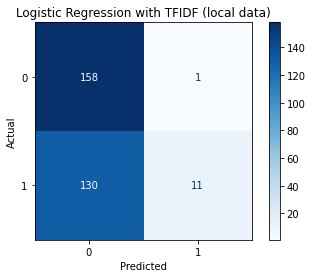

In [0]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

np.set_printoptions(precision=2)

disp = plot_confusion_matrix(classifier, test_vectors,test_values,cmap=plt.cm.Blues,values_format = 'd') #test_values is true values, test_features is the input to be given to be tested, classifier is model name
disp.ax_.set_title("Logistic Regression with TFIDF (local data)")
disp.ax_.set_xlabel("Predicted")
disp.ax_.set_ylabel("Actual")


print(disp.confusion_matrix)
print("Test accuracy: ", metrics.accuracy_score(test_values, predicted))
print("Test precision: ", metrics.precision_score(test_values, predicted))
print("Test recall: ", metrics.recall_score(test_values, predicted))